In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler
import numpy as np

In [2]:
df = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim/after_EDA/Asthma.csv')

In [3]:
df.head()

,CensusTract,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS,Asthma_prevalence
0,1001020100,9.690899,36.760212,0.278663,49.377032,0.788052,31.854621,0.167272,0.066526,0.077568,0.495631,0.000000,9.8
1,1001020200,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000,10.9
2,1001020300,9.745683,36.884999,0.364215,50.772140,0.816773,183.972683,0.078924,0.075626,0.082494,1.528117,0.000000,10.1
3,1001020400,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000,8.8
4,1001020500,9.791458,37.041363,0.499163,51.729998,0.841417,198.171325,0.000000,0.094754,0.091258,1.635841,0.000005,9.2


In [4]:
df.set_index('CensusTract', inplace=True)
df.head()

,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS,Asthma_prevalence
CensusTract,,,,,,,,,,,,
1001020100,9.690899,36.760212,0.278663,49.377032,0.788052,31.854621,0.167272,0.066526,0.077568,0.495631,0.000000,9.8
1001020200,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000,10.9
1001020300,9.745683,36.884999,0.364215,50.772140,0.816773,183.972683,0.078924,0.075626,0.082494,1.528117,0.000000,10.1
1001020400,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000,8.8
1001020500,9.791458,37.041363,0.499163,51.729998,0.841417,198.171325,0.000000,0.094754,0.091258,1.635841,0.000005,9.2


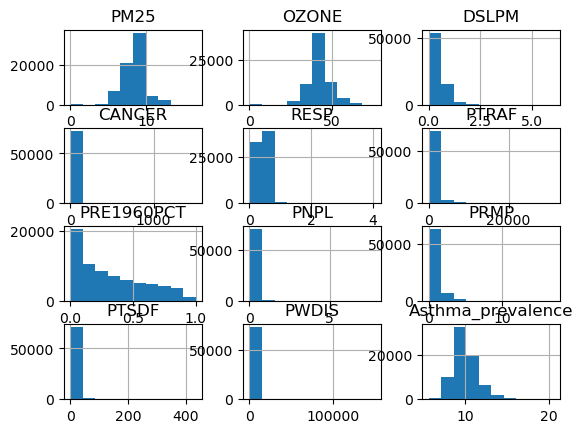

In [5]:
df.hist()
plt.show()

In [6]:
X = df.copy()
X.drop('Asthma_prevalence', axis=1, inplace=True)
y = df['Asthma_prevalence']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

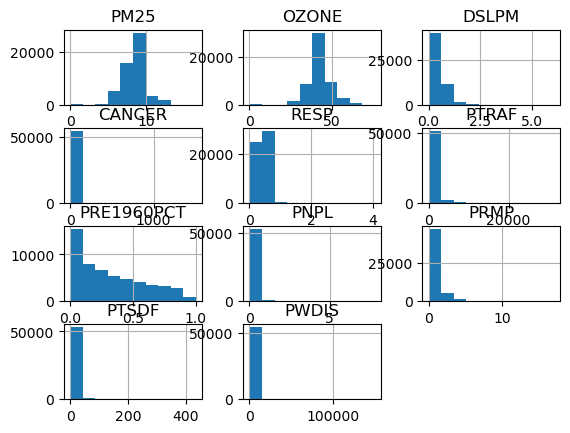

In [8]:
X_train.hist()
plt.show()

In [9]:
X_train.head()

,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,
34013012900,8.879033,39.584332,0.892456,34.633940,0.485609,6864.587032,0.831282,0.273672,0.373720,5.296905,0.000000
18141011304,8.134942,46.296570,0.285709,22.885611,0.281401,23.481152,0.050717,0.206908,0.339967,0.440535,0.000000
6065030101,12.288512,71.033875,1.002600,40.186467,0.625894,6222.003773,0.544444,0.686009,3.638879,7.927005,0.440601
45041002600,8.340545,39.131956,0.204206,34.552035,0.509357,23.784773,0.258032,0.015683,0.099086,0.085753,0.000000
53005010100,11.616038,47.398344,0.227411,27.644729,0.404575,285.223179,0.342572,0.162379,3.500184,2.445790,0.000003


In [10]:
# Saving data without normalization

X_test.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_asthma')
X_train.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_asthma')
y_test.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_asthma')
y_train.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_asthma')

In [20]:
# Taking the log of the data in X_train that are not close to being normally distributed for non_tree models

X_train_log = X_train.copy()
pt = PowerTransformer()
pt.fit(X_train_log[['DSLPM']])
X_train_log['DSLPM'] = pt.transform(X_train_log[['DSLPM']])

pt1 = PowerTransformer()
pt1.fit(X_train_log[['CANCER']])
X_train_log['CANCER'] = pt1.transform(X_train_log[['CANCER']])

pt2 = PowerTransformer()
pt2.fit(X_train_log[['RESP']])
X_train_log['RESP'] = pt2.transform(X_train_log[['RESP']]) 

pt3 = PowerTransformer()
pt3.fit(X_train_log[['PTRAF']])
X_train_log['PTRAF'] = pt3.transform(X_train_log[['PTRAF']])

pt4 = PowerTransformer()
pt4.fit(X_train_log[['PRE1960PCT']])
X_train_log['PRE1960PCT'] = pt4.transform(X_train_log[['PRE1960PCT']])

pt5 = PowerTransformer()
pt5.fit(X_train_log[['PNPL']])
X_train_log['PNPL'] = pt5.transform(X_train_log[['PNPL']])

pt6 = PowerTransformer()
pt6.fit(X_train_log[['PRMP']])
X_train_log['PRMP'] = pt6.transform(X_train_log[['PRMP']])

pt7 = PowerTransformer()
pt7.fit(X_train_log[['PTSDF']])
X_train_log['PTSDF'] = pt7.transform(X_train_log[['PTSDF']])

pt8 = PowerTransformer()
pt8.fit(X_train_log[['PWDIS']])
X_train_log['PWDIS'] = pt8.transform(X_train_log[['PWDIS']])

pt9 = PowerTransformer()
y_train_log = y_train.copy()
y_train_log = np.array(y_train_log)
y_train_log = y_train_log.reshape(-1,1)
pt9.fit(y_train_log)
y_train_log = pt9.transform(y_train_log)
y_train_log = np.ravel(y_train_log)

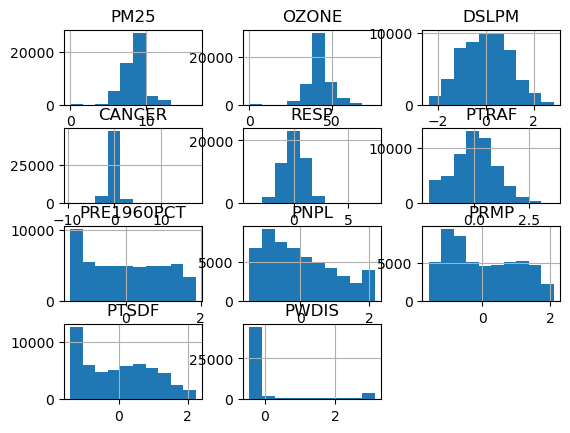

In [21]:
X_train_log.hist()
plt.show()

In [22]:
X_train_log.drop('PWDIS', axis=1, inplace=True)
X_test_log = X_test.copy()
X_test_log.drop('PWDIS', axis=1, inplace=True)

PWDIS should be left out of normalized data since it has zeroes in place of NAN.

In [25]:
# Transforming the test data using the PowerTransformer that fit on the train data
X_test_log['DSLPM'] = pt.transform(X_test_log[['DSLPM']])

X_test_log['CANCER'] = pt1.transform(X_test_log[['CANCER']])

X_test_log['RESP'] = pt2.transform(X_test_log[['RESP']]) 

X_test_log['PTRAF'] = pt3.transform(X_test_log[['PTRAF']])

X_test_log['PRE1960PCT'] = pt4.transform(X_test_log[['PRE1960PCT']])

X_test_log['PNPL'] = pt5.transform(X_test_log[['PNPL']])

X_test_log['PRMP'] = pt6.transform(X_test_log[['PRMP']])

X_test_log['PTSDF'] = pt7.transform(X_test_log[['PTSDF']])

y_test_log = y_test.copy()
y_test_log = np.array(y_test_log)
y_test_log = y_test_log.reshape(-1,1)
y_test_log = pt9.transform(y_test_log)
y_test_log = y_test_log.reshape(18081,)
y_test_log.shape

(18081,)

In [26]:
# Saving data transformed by power transformer

X_test_log.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_log_asthma')
X_train_log.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_log_asthma')
y_test_log = pd.Series(y_test_log)
y_train_log = pd.Series(y_train_log)
y_test_log.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_log_asthma')
y_train_log.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_log_asthma')

### Asthma data should now be ready to model